CEO of the NGO needs to decide how to use the money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 


In [ ]:
## categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then need to suggest the countries which the CEO needs to focus on the most.

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import scale


from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
## Load data
c_data = pd.read_csv('Country-data.csv')
c_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Investigate data

In [4]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
## Investigate dataframe "c_data"
# percentile list 
perc =[0.0,.05,.1,.20, .40, .60, .80,.90,.95,.97,.99,1] 
# list of dtypes to include 
#include =['float', 'int'] 
# calling describe method
c_data.describe(percentiles = perc)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
0%,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
5%,3.460000,12.120000,2.791000,18.130000,1213.000000,0.183400,55.780000,1.390000,465.900000
10%,4.200000,15.660000,3.726000,22.520000,1524.000000,0.587800,57.820000,1.452000,593.800000
20%,6.320000,22.120000,4.486000,28.020000,2548.000000,1.408000,61.880000,1.630000,1146.000000
40%,15.280000,29.580000,5.668000,37.280000,7320.000000,3.700000,70.060000,2.144000,3262.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000


In [6]:
print(c_data.shape)
print(c_data.columns)

(167, 10)
Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')


In [7]:
#Checking for Missing Values
c_data.isnull().sum(axis=0)

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# Check Outliers

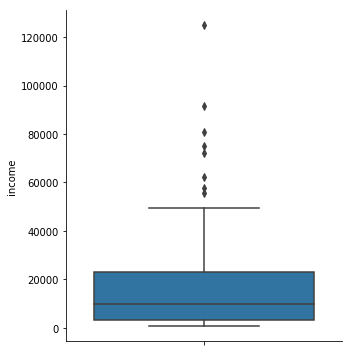

In [8]:
# checking outliers in datafrmae in all numarical variables
sns.catplot(y='income', kind = 'box', data = c_data)

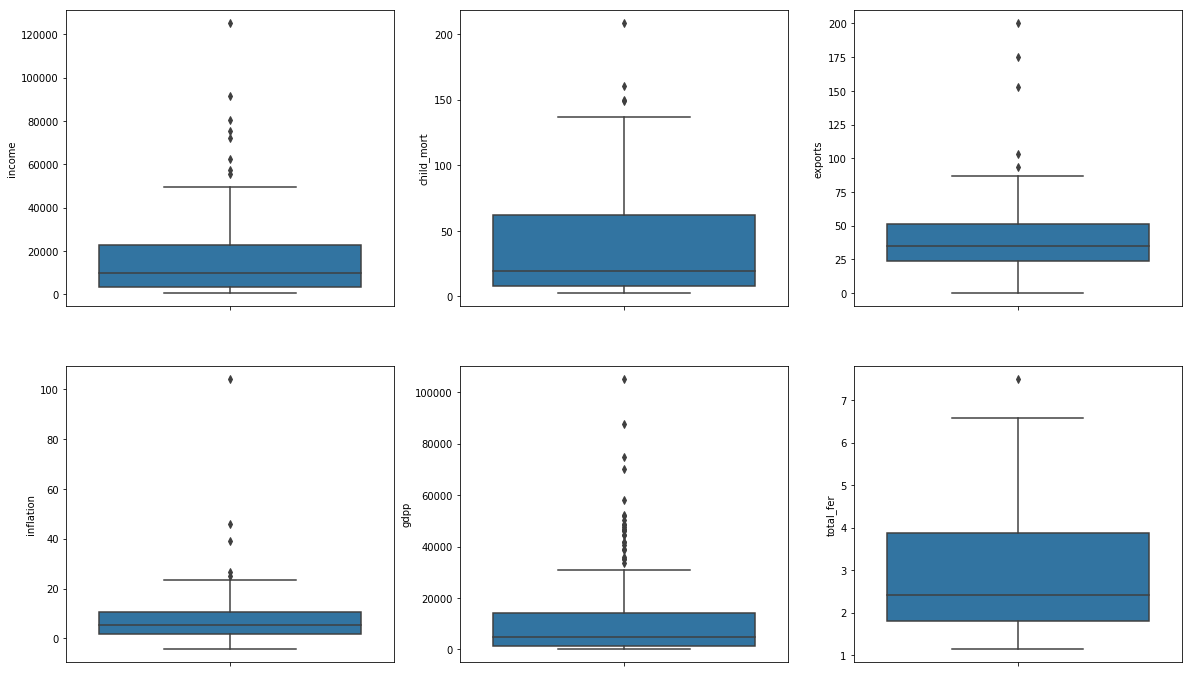

In [9]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(y = 'income', data = c_data)
plt.subplot(2,3,2)
sns.boxplot(y = 'child_mort', data = c_data)
plt.subplot(2,3,3)
sns.boxplot(y = 'exports', data = c_data)
plt.subplot(2,3,4)
sns.boxplot(y = 'inflation', data = c_data)
plt.subplot(2,3,5)
sns.boxplot(y = 'gdpp', data = c_data)
plt.subplot(2,3,6)
sns.boxplot(y = 'total_fer', data = c_data)
plt.show()

## Handel Outliers

In [10]:
c_data1 = c_data

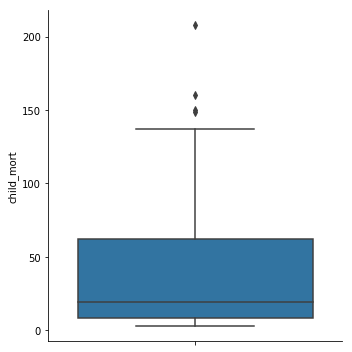

In [11]:
## Handel outliers "child_mort"

Q1 = c_data1.child_mort.quantile(0.0)
Q3 = c_data1.child_mort.quantile(0.96)
IQR = Q3 - Q1
#c_data1 = c_data1[(c_data1.child_mort >= Q1) & (c_data1.child_mort <= Q3)]
#c_data['child_mort'] = c_data[c_data[child_mort <= Q3]]
#c_data['child_mort'] = c_data.child_mort.astype(float)
sns.catplot(y='child_mort', kind = 'box', data = c_data1)

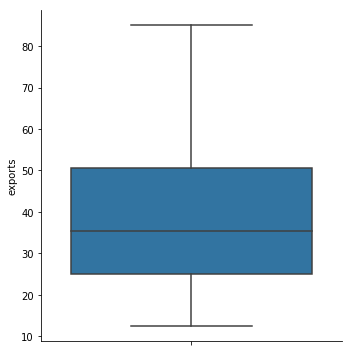

In [12]:
## Handel outliers "exports"

Q1 = c_data1.exports.quantile(0.05)
Q3 = c_data1.exports.quantile(0.96)
IQR = Q3 - Q1
c_data1 = c_data1[(c_data1.exports >= Q1) & (c_data1.exports <= Q3)]
#c_data['child_mort'] = c_data[c_data[child_mort <= Q3]]
#c_data['child_mort'] = c_data.child_mort.astype(float)
sns.catplot(y='exports', kind = 'box', data = c_data1)

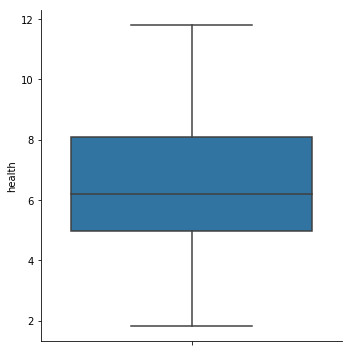

In [13]:
## Handel outliers "health"
#c1 = ''

Q1 = c_data1.health.quantile(0.0)
Q3 = c_data1.health.quantile(0.97)
IQR = Q3 - Q1
c_data1 = c_data1[(c_data1.health >= Q1) & (c_data1.health <= Q3)]
#c_data['child_mort'] = c_data[c_data[child_mort <= Q3]]
#c_data['child_mort'] = c_data.child_mort.astype(float)
sns.catplot(y='health', kind = 'box', data = c_data1)

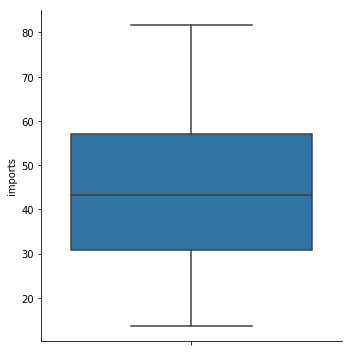

In [14]:
## Handel outliers "imports"
#c1 = ''

Q1 = c_data1.imports.quantile(0)
Q3 = c_data1.imports.quantile(0.99)
IQR = Q3 - Q1
c_data1 = c_data1[(c_data1.imports >= Q1) & (c_data1.imports <= Q3)]
#c_data['child_mort'] = c_data[c_data[child_mort <= Q3]]
#c_data['child_mort'] = c_data.child_mort.astype(float)
sns.catplot(y='imports', kind = 'box', data = c_data1)

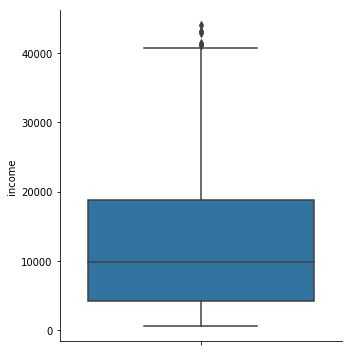

In [15]:
## Handel outliers "income"
Q1= c_data1.income.quantile(0)
Q3 = c_data1.income.quantile(0.95)
IQR = Q3 - Q1
c_data1 = c_data1[(c_data1.income >= Q1) & (c_data1.income <= Q3)]
#c_data['child_mort'] = c_data[c_data[child_mort <= Q3]]
#c_data['child_mort'] = c_data.child_mort.astype(float)
sns.catplot(y='income', kind = 'box', data = c_data1)

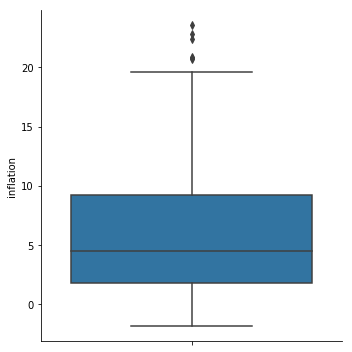

In [16]:
## Handel outliers "inflation"
Q1= c_data1.inflation.quantile(0.0)
Q3 = c_data1.inflation.quantile(0.98)
IQR = Q3 - Q1
c_data1 = c_data1[(c_data1.inflation >= Q1) & (c_data1.inflation <= Q3)]
#c_data['child_mort'] = c_data[c_data[child_mort <= Q3]]
#c_data['child_mort'] = c_data.child_mort.astype(float)
sns.catplot(y='inflation', kind = 'box', data = c_data1)

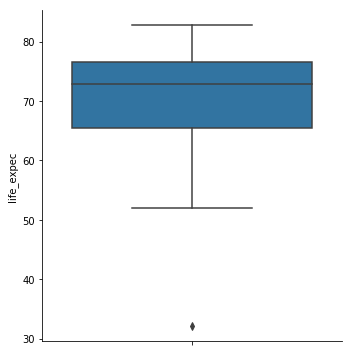

In [17]:
sns.catplot(y='life_expec', kind = 'box', data = c_data1)

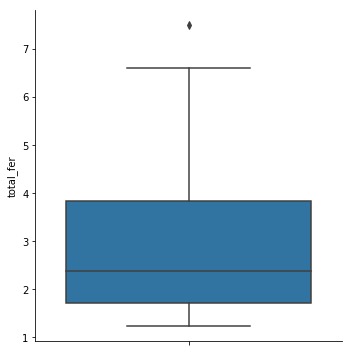

In [18]:
sns.catplot(y='total_fer', kind = 'box', data = c_data1)

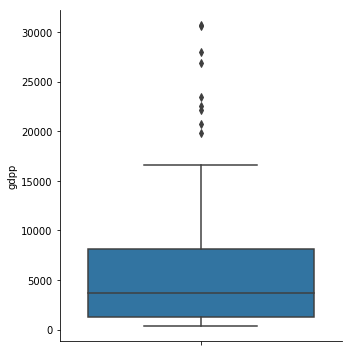

In [19]:
## Handel outliers "gdpp"
Q1= c_data1.gdpp.quantile(0.0)
Q3 = c_data1.gdpp.quantile(.90)
IQR = Q3 - Q1
c_data1 = c_data1[(c_data1.gdpp >= Q1) & (c_data1.gdpp<= Q3)]
#c_data['child_mort'] = c_data[c_data[child_mort <= Q3]]
#c_data['child_mort'] = c_data.child_mort.astype(float)
sns.catplot(y='gdpp', kind = 'box', data = c_data1)

In [20]:
c_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [21]:
## Investigate dataframe "c_data"
# percentile list 
perc =[0.0,.05,.1,.20, .40, .60, .80,.90,.95,.97,.99,1] 
# list of dtypes to include 
#include =['float', 'int'] 
# calling describe method
c_data1.describe(percentiles = perc)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,41.052941,38.129412,6.310672,45.820168,10585.470588,7.057353,69.347899,3.038655,6143.302521
std,39.095537,17.338306,2.035155,16.788023,8624.239087,6.165518,8.202654,1.521722,6746.474047
min,3.200000,12.400000,2.200000,16.000000,609.000000,-1.430000,32.100000,1.230000,334.000000
0%,3.200000,12.400000,2.200000,16.000000,609.000000,-1.430000,32.100000,1.230000,334.000000
5%,4.460000,15.840000,3.444000,20.570000,1372.000000,0.312700,56.230000,1.388000,541.100000
10%,6.080000,19.140000,4.016000,25.080000,1636.000000,0.791400,57.820000,1.478000,694.000000
20%,10.360000,22.760000,4.714000,29.780000,2604.000000,1.696000,61.760000,1.602000,1100.000000
40%,18.820000,29.920000,5.602000,40.660000,6424.000000,3.912000,69.120000,2.246000,2970.000000
50%,24.100000,35.000000,6.010000,45.300000,8460.000000,5.450000,71.300000,2.600000,3680.000000


In [22]:
c_data = c_data1
c_data.shape

(119, 10)

In [23]:

df = c_data.loc[: , c_data.columns != 'country']
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
5,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300


## Scale data set to analyise

In [24]:
n_df = (df-df.mean())/df.std()
n_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,-0.625466,-0.584222,0.117597,0.165584,-0.076003,-0.416405,0.847543,-0.912555,-0.304352
2,-0.351778,0.015606,-1.051847,-0.858956,0.268375,1.466648,0.871925,-0.097689,-0.249508
3,1.993759,1.394057,-1.700447,-0.173944,-0.543291,2.488460,-1.127428,2.051193,-0.387358
4,-0.786610,0.425104,-0.137912,0.779117,0.987279,-0.911092,0.908499,-0.597123,0.897757
5,-0.679181,-1.109071,0.879210,-1.776276,0.940898,2.245172,0.786587,-0.439407,0.616129


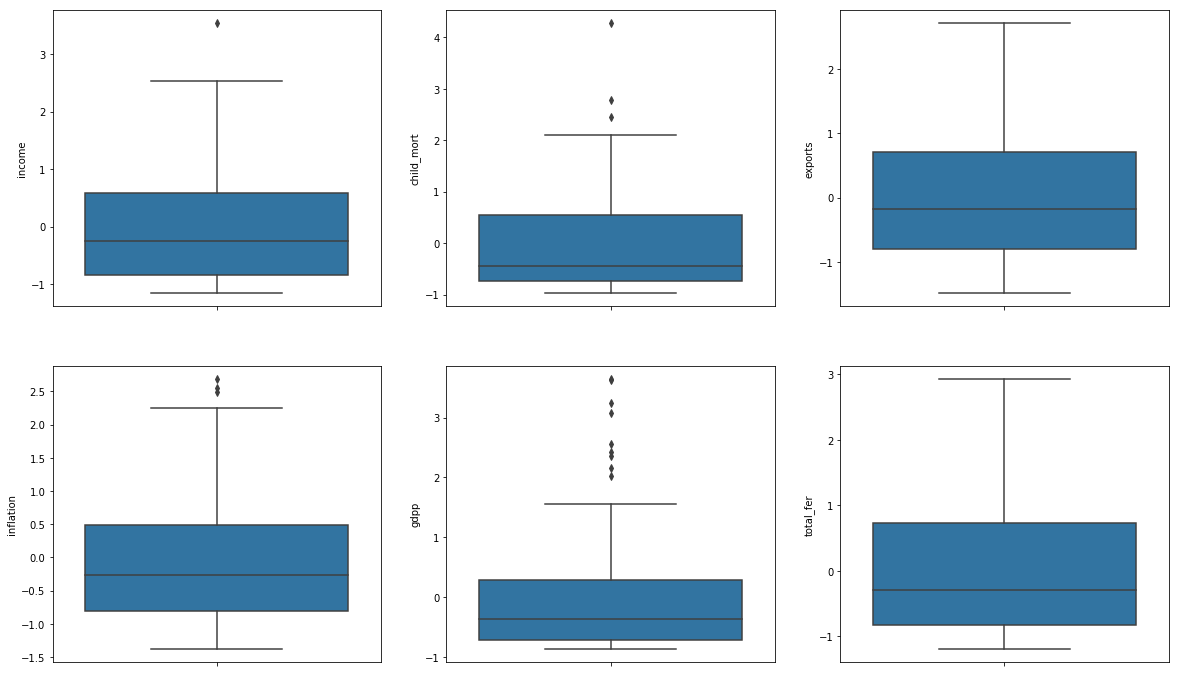

In [25]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(y = 'income', data = n_df)
plt.subplot(2,3,2)
sns.boxplot(y = 'child_mort', data = n_df)
plt.subplot(2,3,3)
sns.boxplot(y = 'exports', data = n_df)
plt.subplot(2,3,4)
sns.boxplot(y = 'inflation', data = n_df)
plt.subplot(2,3,5)
sns.boxplot(y = 'gdpp', data = n_df)
plt.subplot(2,3,6)
sns.boxplot(y = 'total_fer', data = n_df)
plt.show()

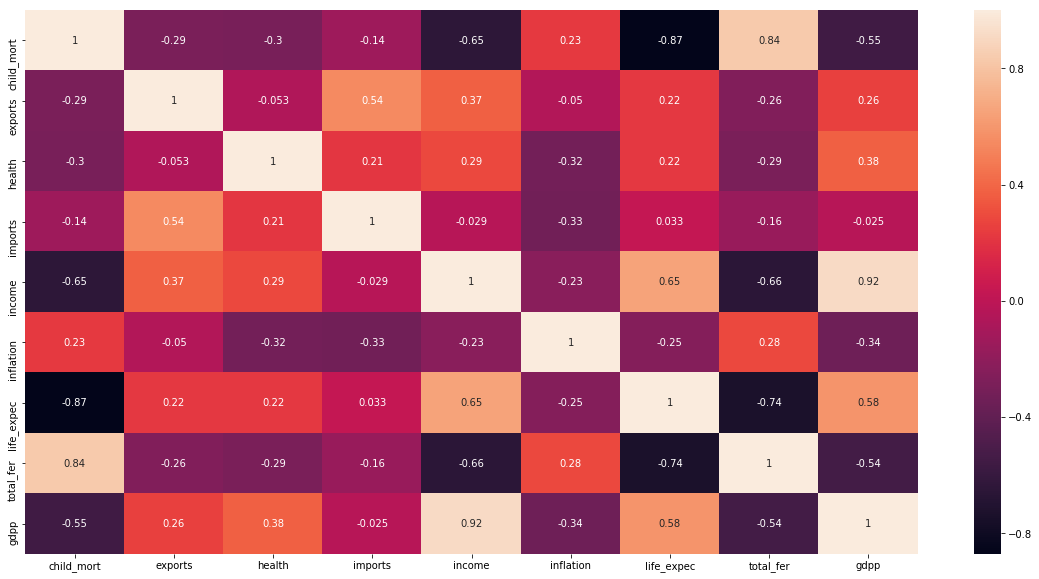

In [26]:
# PCA on Data 
plt.figure(figsize = (20,10))
sns.heatmap(n_df.corr(),annot = True)

# PCA on data

In [28]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [29]:
pca.fit(n_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [30]:
pca.components_

array([[ 0.42801419, -0.19782654, -0.21295418, -0.10415656, -0.42163562,
         0.2051005 , -0.41234759,  0.41595586, -0.3982183 ],
       [-0.07747144, -0.50633823, -0.08207461, -0.75604432,  0.16488258,
         0.27889673,  0.16442039, -0.04875192,  0.15779753],
       [-0.12374238,  0.50793069, -0.62558662, -0.02014583,  0.10937926,
         0.5455807 ,  0.11957244, -0.07046444, -0.07774852],
       [ 0.40450658,  0.29663828,  0.06884011, -0.13579691,  0.43730706,
        -0.00098439, -0.33866611,  0.35349194,  0.54250408],
       [-0.07257471,  0.07265065,  0.68097704,  0.11367579, -0.0136451 ,
         0.70849745, -0.0760272 , -0.01699834, -0.06766817],
       [ 0.12808152, -0.10173647, -0.09241459,  0.01016676,  0.13492246,
         0.02558657, -0.62027371, -0.74822967, -0.03398745],
       [ 0.05312023, -0.57211817, -0.27111395,  0.61705722,  0.14873348,
         0.2696639 ,  0.07107057,  0.09099039,  0.32775924],
       [ 0.77919465,  0.04969339,  0.07018552,  0.01486839, -0

In [31]:
pca.explained_variance_ratio_

array([0.47021719, 0.16539741, 0.13212631, 0.08963656, 0.07449043,
       0.02874254, 0.02302269, 0.01046919, 0.00589769])

In [32]:
## Pick two PCA components
colnames = list(n_df.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,0.428014,-0.077471,child_mort
1,-0.197827,-0.506338,exports
2,-0.212954,-0.082075,health
3,-0.104157,-0.756044,imports
4,-0.421636,0.164883,income
5,0.205100,0.278897,inflation
6,-0.412348,0.164420,life_expec
7,0.415956,-0.048752,total_fer
8,-0.398218,0.157798,gdpp


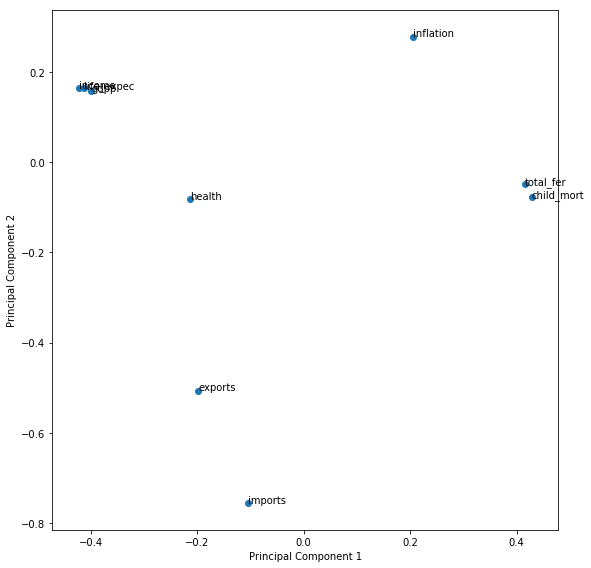

In [33]:
## Visualise dimentions on first two PCA componets on the base of variance to check co-relation. 
## "total_fer" & "child_mort" has very low covariance
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

## checking of how many component would be relevent for this country dataset.
#### 4 PCA components covering maximum data so we are going consider 4 PCA components to  Analyize country dataset.

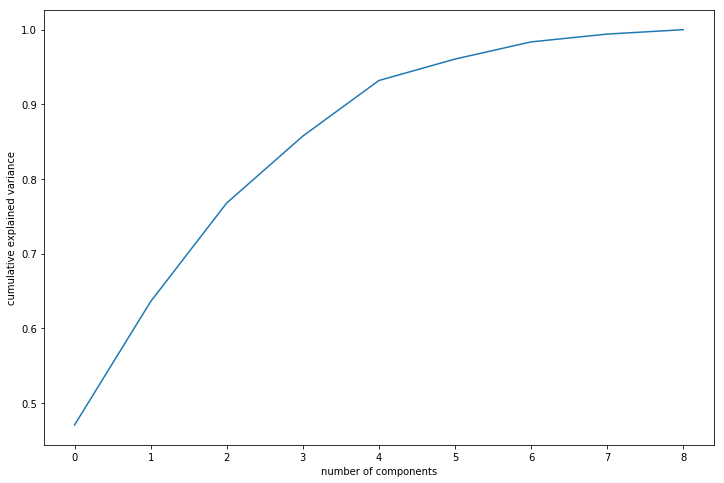

In [610]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [34]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [35]:
df_train_pca = pca_final.fit_transform(n_df)
df_train_pca.shape

(119, 4)

In [36]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

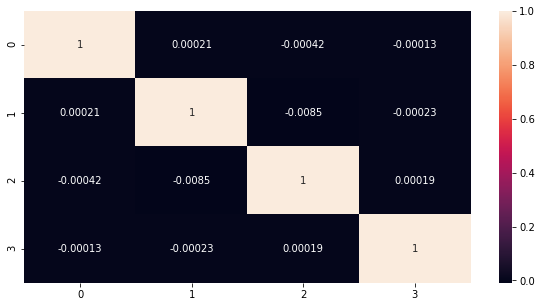

In [37]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)

In [38]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0002057120975118819 , min corr:  -0.008539619458114947


In [42]:
df_train_pca[5: ,1]

array([-0.61526744, -1.07639539, -0.714885  ,  0.06345751, -1.51231109,
       -0.04453976,  0.61429447,  1.39782495,  0.10242017,  1.38141439,
       -0.35030306,  0.05669301,  0.53013528,  0.67524359, -0.53617723,
        1.60467549, -0.40004458,  0.89931287,  0.729444  , -1.34284935,
       -1.5340035 , -1.98660432,  0.25199149,  0.40523172,  1.60434687,
       -0.99374386,  1.05134332, -0.64510239,  1.110426  , -1.0699879 ,
       -1.0527889 , -1.46416686, -0.12389606,  1.74113191,  1.67629979,
       -1.01304432,  0.07538942,  0.14683592, -0.22741005, -1.96517196,
       -0.12455276, -0.60014225, -0.07005551, -0.21178526,  2.15477392,
        1.58094446,  2.32557637, -1.10197461, -1.8015752 , -2.32667917,
       -0.85162081, -1.607097  , -0.27027593,  1.20998404, -1.39167566,
       -0.37066283,  1.54582306,  2.1186759 ,  0.38151366,  0.8153016 ,
        0.42673992, -0.3528059 ,  1.48851207,  0.66035674, -0.06465248,
       -0.40777048,  1.99634304, -0.05073851,  0.93195238,  1.09

In [43]:
## create dataFrame from the PCA's
mydf = pd.DataFrame(df_train_pca, columns=['A','B','C','D'])
#mydf = pd.DataFrame({'A':df_train_pca[0],'B':df_train_pca[1],'C':df_train_pca[2],'D':df_train_pca[3]})
mydf.head()

,A,B,C,D
0,-0.855482,-0.227921,-0.335437,-1.263436
1,0.047495,-1.244787,1.759583,-0.410392
2,3.169743,0.433401,2.578709,1.848593
3,-2.054186,0.551182,0.002359,0.030439
4,-0.766793,-2.997358,0.673137,0.208372


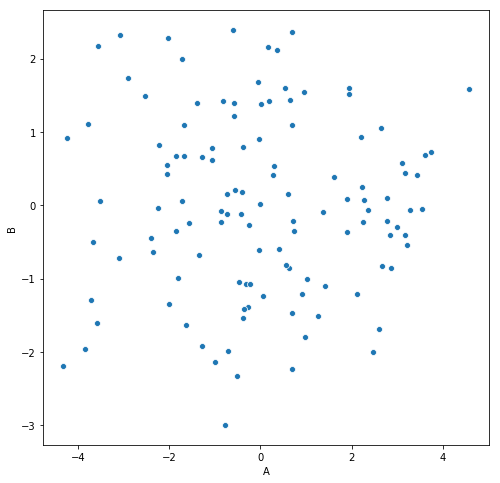

In [44]:
## Visualize whole data in two dimention using two PCA's
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x='A',y='B',data=mydf)
plt.show()

## Useing Hopkins method to find data tendency towards clustring 
#### tendency showing in the range to 0 & 1 : > 0.5 output would be good data to cluster on it.

In [45]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [51]:
hopkins(mydf)

0.723978744854605

## Creating KMeans object using intilazing randomely k =4

In [52]:
# Kmeans with K=4
model_clus5 = KMeans(n_clusters = 4, max_iter=50)
model_clus5.fit(mydf)
                    

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Create silhouette score to find best k values 

In [55]:
mydf_mod1 = mydf

In [56]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(mydf_mod1)
    sse_.append([k, silhouette_score(mydf_mod1, kmeans.labels_)])

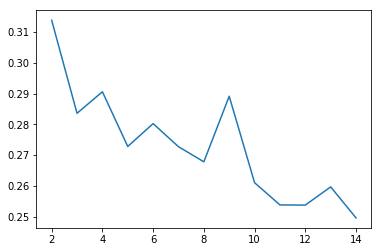

In [57]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

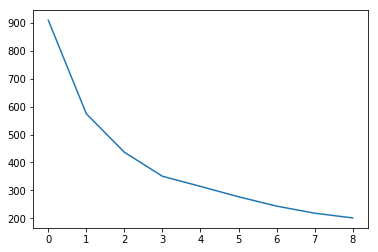

In [58]:
## From the above analysis we find that 2 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_cluster in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_cluster, max_iter = 50)
    model_clus.fit(mydf_mod1)
    ssd.append(model_clus.inertia_)
    
plt.plot(ssd)

## elbow diagram showing most bend at cordinate 3 so we are going to consider k =3 on the base of elbow and silhouette diagram

In [59]:
## Create Cluster model using k = 3
#c_data.index = pd.RangeIndex(len(c_data.index))
my_cluster1 = KMeans(n_clusters=3, max_iter=50, random_state=50)
my_cluster1.fit(mydf_mod1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [60]:
c_data.index

Int64Index([  1,   2,   3,   4,   5,   6,   9,  10,  11,  12,
            ...
            153, 154, 155, 156, 160, 161, 162, 164, 165, 166],
           dtype='int64', length=119)

In [61]:
c_data.index = pd.RangeIndex(len(c_data.index))

In [62]:
my_cluster1.labels_

array([1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0,
       1, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0,
       2, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2,
       2, 2, 1, 0, 0, 2, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2, 2,
       1, 1, 1, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 1, 0, 0])

In [63]:
c_data.index = pd.RangeIndex(len(c_data.index))
c_data_km = pd.concat([c_data, pd.Series(my_cluster1.labels_)], axis=1)
c_data_km.rename(columns={0:'cluster_id'}, inplace=True)
c_data_km.head(10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
1,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
2,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
3,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2
4,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1
5,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1
6,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1
7,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,2
8,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,2
9,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,1


## clusters must be visualised some of the original variables

<Figure size 576x576 with 0 Axes>

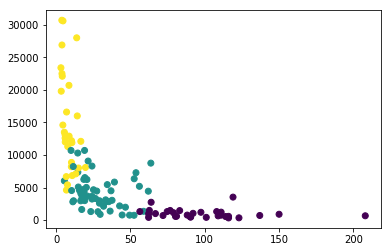

In [64]:
### cluster representation on the "c_data_km['child_mort'] & y = c_data_km['gdpp']" features
import pylab as pl
%matplotlib inline
fig = plt.figure(figsize = (8,8))
pl.figure('K-means with 3 clusters')
pl.scatter(x= c_data_km['child_mort'], y = c_data_km['gdpp'], c=c_data_km['cluster_id'])
#pl.scatter(x= c_data_km['child_mort'], y = c_data_km['exports'], c=c_data_km['cluster_id'])
#pl.legend()
pl.show()

<Figure size 576x576 with 0 Axes>

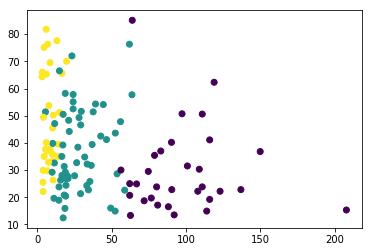

In [65]:
import pylab as pl
%matplotlib inline
fig = plt.figure(figsize = (8,8))
pl.figure('K-means with 3 clusters')
pl.scatter(x= c_data_km['child_mort'], y = c_data_km['exports'], c=c_data_km['cluster_id'])
#pl.scatter(x= c_data_km['child_mort'], y = c_data_km['exports'], c=c_data_km['cluster_id'])
#pl.legend()
pl.show()

<Figure size 576x576 with 0 Axes>

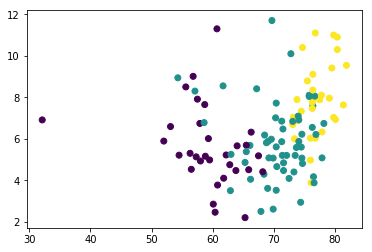

In [66]:
fig = plt.figure(figsize = (8,8))
pl.figure('K-means with 3 clusters')
pl.scatter(x= c_data_km['life_expec'], y = c_data_km['health'], c=c_data_km['cluster_id'])
#pl.scatter(x= c_data_km['child_mort'], y = c_data_km['exports'], c=c_data_km['cluster_id'])
#pl.legend()
pl.show()

In [67]:
labels = my_cluster1.labels_
#labels

In [68]:
#centroids = model_clus5.cluster_centers_
#centroids
df_train_pca[:, 0]

array([-0.85548172,  0.0474947 ,  3.1697426 , -2.05418589, -0.76679328,
       -0.02997974, -0.31958379, -3.098804  , -3.51425223,  1.26145884,
       -2.25043519, -1.06288275, -0.57761073,  2.77434448,  0.0137568 ,
        0.73989993, -1.720037  ,  0.30619244, -1.67085829,  3.20997866,
        0.53567314,  2.83229342, -0.03813668,  3.73882606, -2.00619677,
       -0.38488647, -0.71482322,  2.21843508,  3.42956315,  1.95252066,
       -1.81604575,  2.63372745, -2.34893186, -3.7813137 , -0.23010986,
       -0.47053582,  0.68415793, -0.42730252, -2.8960767 , -0.05541266,
        1.02521065,  2.27680427, -0.73225155,  2.24474095, -3.85256959,
       -0.73551918,  0.39806009,  3.27659771,  2.78404059,  0.15888956,
        4.57242875, -3.06826808,  1.41405591,  0.9864328 , -0.51388753,
        0.62288569, -3.57554083, -0.24148512, -0.57204821, -0.26984751,
        1.90267914,  0.95649551,  0.35741361,  1.61641249, -2.22685574,
       -2.05620859, -1.85648271, -2.53135138, -1.28748054,  2.36

In [69]:
c_data_km['cluster_id'].value_counts()

1    58
0    31
2    30
Name: cluster_id, dtype: int64

In [70]:
#fig = plt.figure(figsize = (8,8))
#sns.scatterplot(x='A',y='B',hue='cluster_id',legend='full',data=c_data_km)

## clusters  visualised on Principal Components

<Figure size 576x576 with 0 Axes>

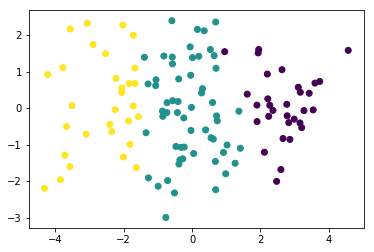

In [71]:
import pylab as pl
%matplotlib inline
fig = plt.figure(figsize = (8,8))
pl.figure('K-means with 3 clusters')
pl.scatter(df_train_pca[:, 0], df_train_pca[:, 1], c=labels)
pl.show()

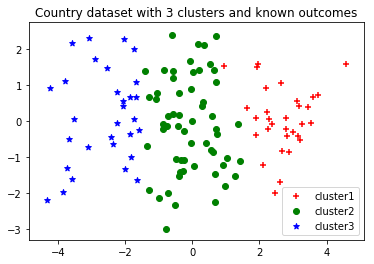

In [109]:
import pylab as pl
for i in range(0, df_train_pca.shape[0]):
    if c_data_km.cluster_id[i] == 0:
        c1 = pl.scatter(df_train_pca[i,0],df_train_pca[i,1],c='r',marker='+')
    elif c_data_km.cluster_id[i] == 1:
        c2 = pl.scatter(df_train_pca[i,0],df_train_pca[i,1],c='g',marker='o')
    elif c_data_km.cluster_id[i] == 2:
        c3 = pl.scatter(df_train_pca[i,0],df_train_pca[i,1],c='b',marker='*')
    #elif c_data_km.Cluster_id[i] == 3:
     #   c4 = pl.scatter(df_train_pca[i,0],df_train_pca[i,1],c='y',marker='*')
pl.legend([c1, c2, c3], ['cluster1', 'cluster2','cluster3'])
pl.title('Country dataset with 3 clusters and known outcomes')
pl.show()

In [73]:
c_data_km.groupby('cluster_id').size()

cluster_id
0    31
1    58
2    30
dtype: int64

In [74]:
#c_data_km = pd.merge(n_df, c_data_km, left_index=True, right_index=True)
#c_data_km.head()

In [75]:
#c_data_km = c_data_km.drop(['A','B','C','D'], axis=1)
#c_data_km.head()

In [76]:
c1 = c_data_km.loc[c_data_km['cluster_id']==0]
c2 = c_data_km.loc[c_data_km['cluster_id']==1]
c3 = c_data_km.loc[c_data_km['cluster_id']==2]
#c4 = c_data_km.loc[c_data_km['Cluster_id']==3]



In [77]:
c1.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
2,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
13,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,0
19,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,0
21,Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310,0
23,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897,0
27,Comoros,88.2,16.5,4.51,51.7,1410,3.870,65.9,4.75,769,0
28,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334,0
29,"Congo, Rep.",63.9,85.1,2.46,54.7,5190,20.700,60.4,4.95,2740,0
31,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.390,56.3,5.27,1220,0
41,Gambia,80.3,23.8,5.69,42.7,1660,4.300,65.5,5.71,562,0


## Analysis of the clusters

In [78]:
c3

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
3,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2
7,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,2
8,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,2
10,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,2
16,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610,2
18,Bulgaria,10.8,50.2,6.87,53.0,15300,1.110,73.9,1.57,6840,2
24,Chile,8.7,37.7,7.96,31.3,19400,8.960,79.1,1.88,12900,2
30,Costa Rica,10.2,33.2,10.90,35.0,13000,6.570,80.4,1.92,8200,2
32,Croatia,5.5,37.6,7.76,38.1,20100,0.821,76.3,1.55,13500,2
33,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,2


In [79]:
#c4

In [80]:
cls_child_mort = pd.DataFrame(c_data_km.groupby(['cluster_id']).child_mort.mean())
cls_exports =    pd.DataFrame(c_data_km.groupby(['cluster_id']).exports.mean())
cls_healtht =    pd.DataFrame(c_data_km.groupby(['cluster_id']).health.mean())
cls_imports =    pd.DataFrame(c_data_km.groupby(['cluster_id']).imports.mean())
cls_income =     pd.DataFrame(c_data_km.groupby(['cluster_id']).income.mean())
cls_inflation=   pd.DataFrame(c_data_km.groupby(['cluster_id']).inflation.mean())
cls_life_expec = pd.DataFrame(c_data_km.groupby(['cluster_id']).life_expec.mean())
cls_total_fer =  pd.DataFrame(c_data_km.groupby(['cluster_id']).total_fer.mean())
cls_gdpp =       pd.DataFrame(c_data_km.groupby(['cluster_id']).gdpp.mean())



In [81]:
cls_gdpp

,gdpp
cluster_id,
0,1002.612903
1,4356.758621
2,14909.333333


### Mean of all features on groupby cluster ID.

In [82]:
mean_df = pd.concat([pd.Series([0,1,2]),cls_child_mort,cls_exports ,cls_healtht,cls_imports,cls_income,cls_inflation,cls_life_expec,cls_total_fer,cls_gdpp], axis=1)
mean_df.rename(columns={0:'cluster_id'}, inplace=True)
mean_df

,cluster_id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,96.845161,29.577419,5.591613,41.958065,2335.516129,9.442419,59.329032,5.176129,1002.612903
1,1,28.103448,37.270690,5.878621,44.994828,9362.931034,8.176569,70.718966,2.569655,4356.758621
2,2,8.436667,48.626667,7.889000,51.406667,21474.000000,2.428967,77.050000,1.736667,14909.333333


## Countries name
## Country list in cluster 0. As we can see cluster 0 has countries name which belongs to poor developing countries. Cluster 0's countries direst need of aid.

In [83]:

under_dev_countries =  c1['country']
under_dev_countries

2                Angola
13                Benin
19         Burkina Faso
21             Cameroon
23                 Chad
27              Comoros
28     Congo, Dem. Rep.
29          Congo, Rep.
31        Cote d'Ivoire
41               Gambia
43                Ghana
47               Guinea
48        Guinea-Bissau
50                Haiti
60                Kenya
61             Kiribati
63                  Lao
69           Madagascar
70               Malawi
72                 Mali
73           Mauritania
78           Mozambique
80                Niger
81             Pakistan
91              Senegal
101               Sudan
104            Tanzania
106                Togo
111              Uganda
117               Yemen
118              Zambia
Name: country, dtype: object

In [84]:
#sns.countplot(mean_df,hue='cluster_id')
# Let's create pie charts instead of a count plots
def pie_chart(dataframe):
    """
    creates a pie chart
    input: dataframe with a 'category' as index and a numerical column
    output: pie chart
    """
    labels = dataframe.index.values
    sizes = dataframe.values
    
       
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')# Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(dataframe)
    plt.show()

## Visualization cluster on the bases of summary of variables

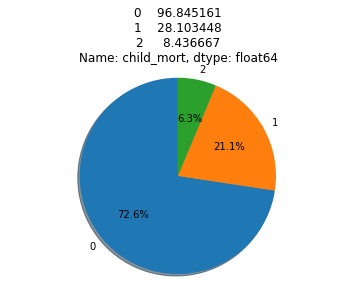

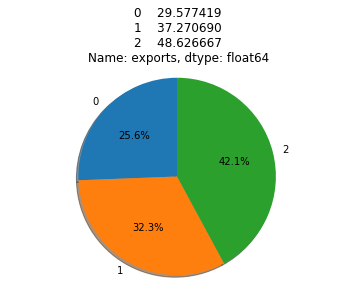

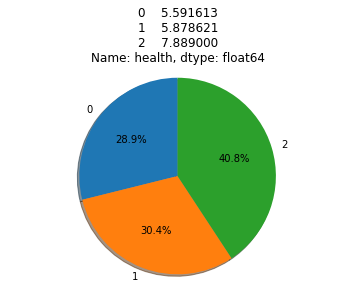

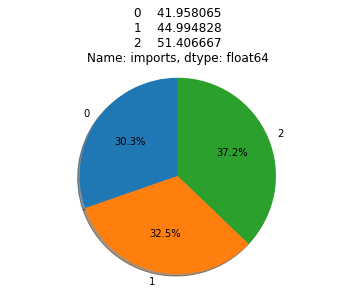

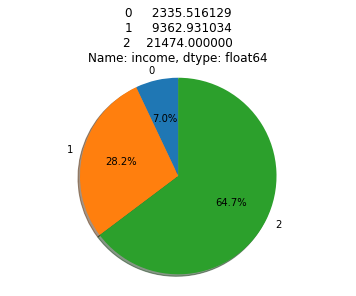

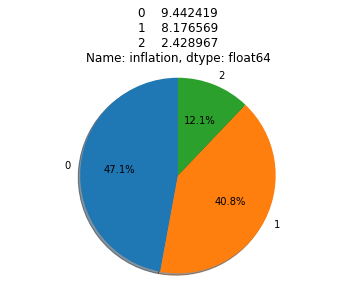

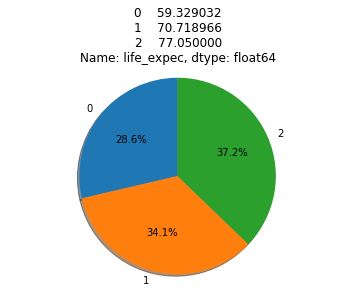

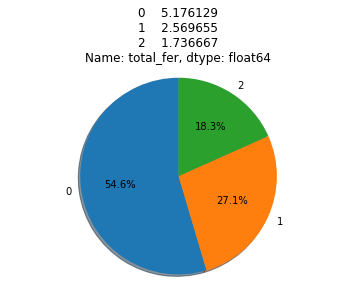

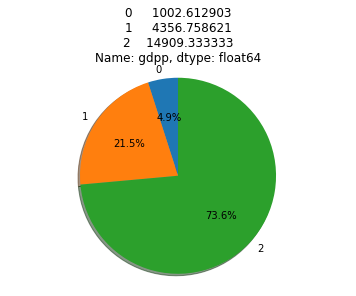

In [85]:

pie_chart(mean_df['child_mort'])
pie_chart(mean_df['exports'])
pie_chart(mean_df['health'])
pie_chart(mean_df['imports'])
pie_chart(mean_df['income'])
pie_chart(mean_df['inflation'])
pie_chart(mean_df['life_expec'])
pie_chart(mean_df['total_fer'])
pie_chart(mean_df['gdpp'])

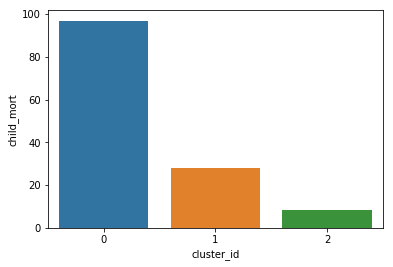

In [86]:
sns.barplot(x=mean_df.cluster_id, y=mean_df.child_mort)

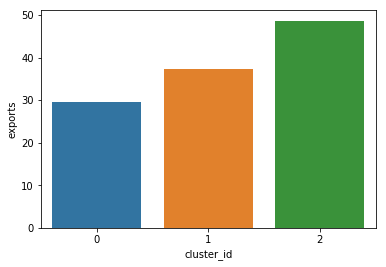

In [87]:
sns.barplot(x=mean_df.cluster_id, y=mean_df.exports)

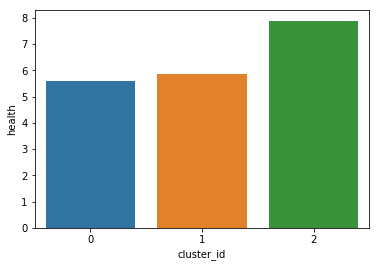

In [88]:
sns.barplot(x=mean_df.cluster_id, y=mean_df.health)

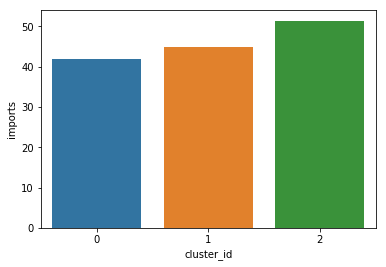

In [89]:
sns.barplot(x=mean_df.cluster_id, y=mean_df.imports)

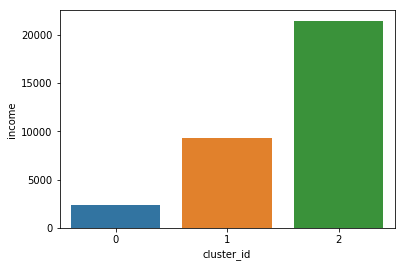

In [90]:
sns.barplot(x=mean_df.cluster_id, y=mean_df.income)

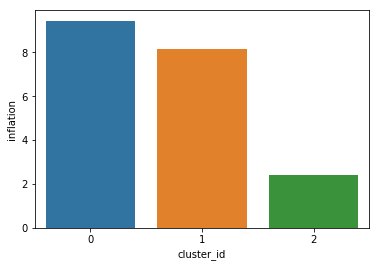

In [91]:
sns.barplot(x=mean_df.cluster_id, y=mean_df.inflation)

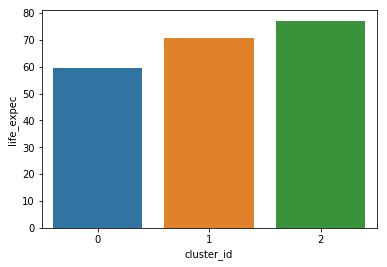

In [92]:
sns.barplot(x=mean_df.cluster_id, y=mean_df.life_expec)

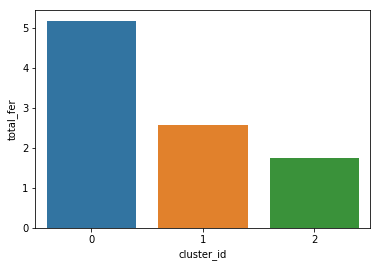

In [93]:
sns.barplot(x=mean_df.cluster_id, y=mean_df.total_fer)

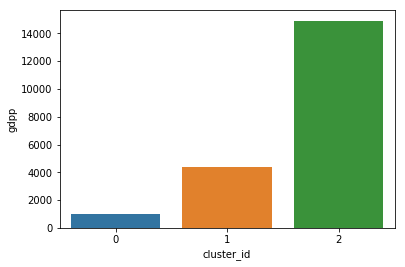

In [94]:
sns.barplot(x=mean_df.cluster_id, y=mean_df.gdpp)

#  Heirarchical Clustering

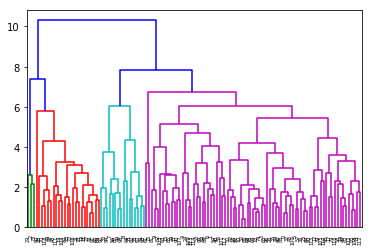

In [111]:
h_cluster = linkage(n_df, method = "complete", metric='euclidean')
dendrogram(h_cluster)
plt.show()

In [96]:
h_clusterCut = pd.Series(cut_tree(h_cluster, n_clusters=3).reshape(-1 ,))
hc_data = pd.concat([c_data, h_clusterCut], axis =1)
hc_data.rename(columns={0:'hc_clusterid'}, inplace=True)
hc_data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hc_clusterid
0,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
1,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
2,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
3,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
4,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
5,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
6,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0
7,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,2
8,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,2
9,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,0


In [97]:
hcls_child_mort = pd.DataFrame(hc_data.groupby(['hc_clusterid']).child_mort.mean())
hcls_exports =    pd.DataFrame(hc_data.groupby(['hc_clusterid']).exports.mean())
hcls_healtht =    pd.DataFrame(hc_data.groupby(['hc_clusterid']).health.mean())
hcls_imports =    pd.DataFrame(hc_data.groupby(['hc_clusterid']).imports.mean())
hcls_income =     pd.DataFrame(hc_data.groupby(['hc_clusterid']).income.mean())
hcls_inflation=   pd.DataFrame(hc_data.groupby(['hc_clusterid']).inflation.mean())
hcls_life_expec = pd.DataFrame(hc_data.groupby(['hc_clusterid']).life_expec.mean())
hcls_total_fer =  pd.DataFrame(hc_data.groupby(['hc_clusterid']).total_fer.mean())
hcls_gdpp =       pd.DataFrame(hc_data.groupby(['hc_clusterid']).gdpp.mean())



In [98]:
mean_hdf = pd.concat([pd.Series([0,1,2]),hcls_child_mort,hcls_exports,hcls_healtht,hcls_imports,hcls_income,hcls_inflation,hcls_life_expec,hcls_total_fer,hcls_gdpp], axis=1)
mean_hdf.rename(columns={0:'hc_clusterid'}, inplace=True)
mean_hdf.head(10) 

,hc_clusterid,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,27.628571,36.675325,6.286364,45.218182,10245.584416,7.458299,71.368831,2.503506,5170.805195
1,1,101.365385,30.961538,5.533462,42.326923,2098.500000,8.765192,58.292308,5.387308,946.961538
2,2,7.650000,56.775000,7.690625,54.393750,26012.500000,2.352562,77.587500,1.797500,19267.500000


## Country list in cluster 1. As we can see cluster 1 has countries name which belongs to poor devloping countries. Cluster 1's countries direst need of aids.


In [99]:
## Country list in cluster 1. As we can see cluster 1 has countries name which belongs to poor devloping 
### countries. Cluster 1's countries direst need of aids.

hc_under_dev_countries = hc_data.loc[hc_data['hc_clusterid'] == 1, 'country' ]
hc_under_dev_countries

2                Angola
13                Benin
19         Burkina Faso
21             Cameroon
23                 Chad
27              Comoros
28     Congo, Dem. Rep.
29          Congo, Rep.
31        Cote d'Ivoire
41               Gambia
43                Ghana
47               Guinea
48        Guinea-Bissau
50                Haiti
60                Kenya
69           Madagascar
70               Malawi
72                 Mali
73           Mauritania
78           Mozambique
80                Niger
91              Senegal
104            Tanzania
106                Togo
111              Uganda
118              Zambia
Name: country, dtype: object

## Visualization cluster on the bases of summary of variables

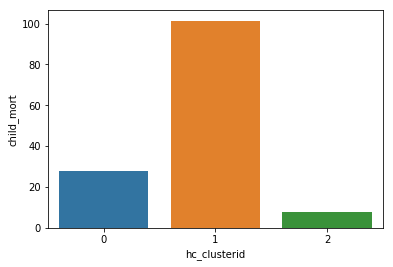

In [100]:
sns.barplot(x=mean_hdf.hc_clusterid, y=mean_hdf.child_mort)

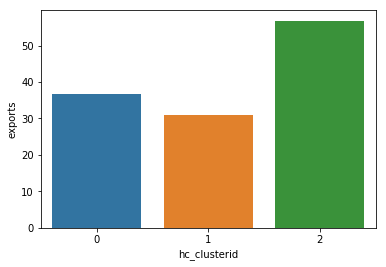

In [101]:
sns.barplot(x=mean_hdf.hc_clusterid, y=mean_hdf.exports)


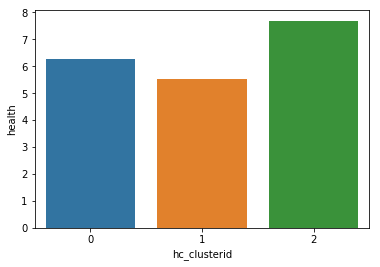

In [102]:
sns.barplot(x=mean_hdf.hc_clusterid, y=mean_hdf.health)


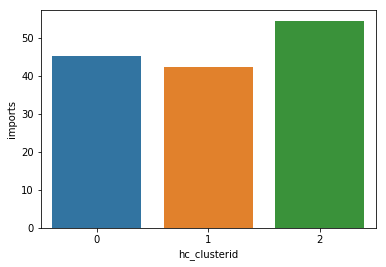

In [103]:
sns.barplot(x=mean_hdf.hc_clusterid, y=mean_hdf.imports)


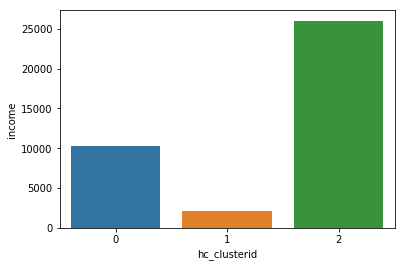

In [104]:
sns.barplot(x=mean_hdf.hc_clusterid, y=mean_hdf.income)


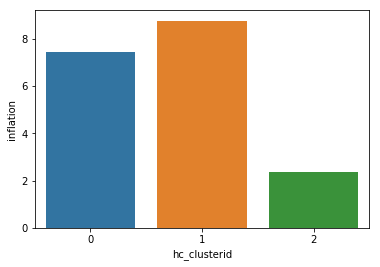

In [105]:
sns.barplot(x=mean_hdf.hc_clusterid, y=mean_hdf.inflation)


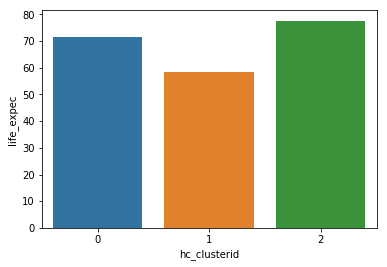

In [106]:
sns.barplot(x=mean_hdf.hc_clusterid, y=mean_hdf.life_expec)


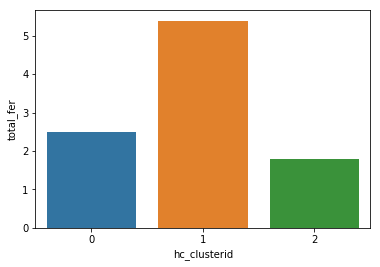

In [107]:
sns.barplot(x=mean_hdf.hc_clusterid, y=mean_hdf.total_fer)


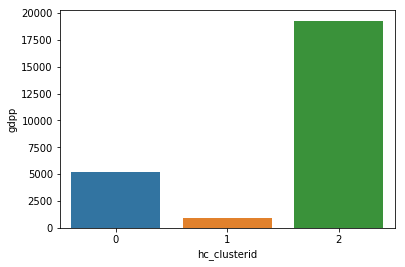

In [108]:
sns.barplot(x=mean_hdf.hc_clusterid, y=mean_hdf.gdpp)